Loading spectrum for ID: 1
Available columns: ['flux', 'loglam', 'ivar', 'and_mask', 'or_mask', 'wdisp', 'sky', 'model']
Filename: data/spec-0571-52286-0588_DoR0.88.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     143   ()      
  1  COADD         1 BinTableHDU     26   3826R x 8C   ['E', 'E', 'E', 'J', 'J', 'E', 'E', 'E']   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   
Spectru

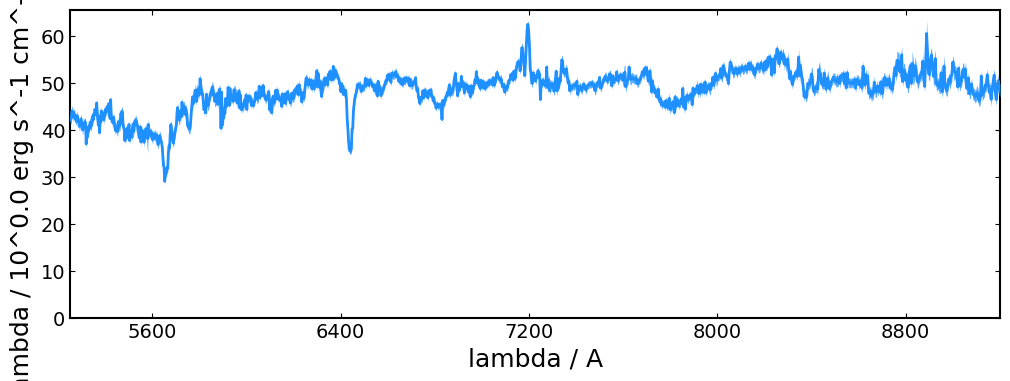

In [34]:
import numpy as np
import bagpipes as pipes
from astropy.io import fits

def bin(spectrum, binn):
    """ Bins up two or three column spectral data by a specified factor. """
    binn = int(binn)
    nbins = len(spectrum) // binn
    binspec = np.zeros((nbins, spectrum.shape[1]))

    for i in range(binspec.shape[0]):
        spec_slice = spectrum[i*binn:(i+1)*binn, :]
        binspec[i, 0] = np.mean(spec_slice[:, 0])
        binspec[i, 1] = np.mean(spec_slice[:, 1])

        if spectrum.shape[1] == 3:
            binspec[i,2] = (1./float(binn)
                            *np.sqrt(np.sum(spec_slice[:, 2]**2)))

    return binspec

def load_spec(ID):
    """ Loads SDSS spectroscopic data from file. """
    print(f"Loading spectrum for ID: {ID}")  # Debug print
    
    hdulist = fits.open("data/spec-0571-52286-0588_DoR0.88.fits")
    print("Available columns:", hdulist[1].data.names)
    hdulist.info()
    # Convert log wavelength to wavelength (Angstroms)
    wave = 10**hdulist[1].data["loglam"]  # Removed [0] indexing
    
    # Get flux directly
    flux = hdulist[1].data["flux"]  # Removed [0] indexing
    
    # Convert inverse variance to error
    # Adding small number to prevent division by zero
    error = 1.0 / np.sqrt(hdulist[1].data["ivar"] + 1e-10)  # Removed [0] indexing
    
    spectrum = np.c_[wave, flux, error]
    print(f"Spectrum shape before mask: {spectrum.shape}")  # Debug print
    
    mask = (spectrum[:,0] < 9250.) & (spectrum[:,0] > 5250.)
    spectrum_masked = spectrum[mask]
    print(f"Spectrum shape after mask: {spectrum_masked.shape}")  # Debug print
    
    hdulist.close()
    
    binned_spectrum = bin(spectrum_masked, 2)
    print(f"Binned spectrum shape: {binned_spectrum.shape}")  # Debug print
    
    return binned_spectrum

# First, let's test the load_spec function directly
test_spectrum = load_spec("1")
print("Test spectrum loaded successfully")

# Now create the galaxy object
goodss_filt_list = np.loadtxt("filters/goodss_filt_list.txt", dtype="str")

galaxy = pipes.galaxy("1", load_data=load_spec, filt_list=goodss_filt_list, photometry_exists=False)

fig = galaxy.plot()

#metallicyt vs veolicty dispersion plot?


Loading spectrum for ID: 1
Spectrum shape before mask: (3826, 3)
Spectrum shape after mask: (2439, 3)
Binned spectrum shape: (1219, 3)

Bagpipes: fitting object 1

Starting the nautilus sampler...
Please report issues at github.com/johannesulf/nautilus.
Status    | Bounds | Ellipses | Networks | Calls    | f_live | N_eff | log Z    
Finished  | 1      | 0        | 0        | 100100   | N/A    | 100100 | -1613374

Completed in 937.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
exp_tau:age                    9.120     11.497     13.872
exp_tau:dust                   0.407      1.052      1.699
exp_tau:massformed             7.132      9.523     11.891
exp_tau:metallicity            0.477      1.291      2.117
exp_tau:tau                    1.848      5.146      8.460
redshift                       0.160      0.498      0.840




/Users/charl/Documents/PythonPlay/AS01_Testing/.venv/lib/python3.11/site-packages/bagpipes/models/star_formation_history.py:125: RuntimeWarning: divide by zero encountered in log10
  self.stellar_mass = np.log10(np.sum(self.live_frac_grid*self.ceh.grid))
/Users/charl/Documents/PythonPlay/AS01_Testing/.venv/lib/python3.11/site-packages/bagpipes/models/star_formation_history.py:126: RuntimeWarning: divide by zero encountered in log10
  self.formed_mass = np.log10(np.sum(self.ceh.grid))
/Users/charl/Documents/PythonPlay/AS01_Testing/.venv/lib/python3.11/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/Users/charl/Documents/PythonPlay/AS01_Testing/.venv/lib/python3.11/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: invalid value encountered in scalar subtract
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/Users/charl/Documents/PythonPlay/

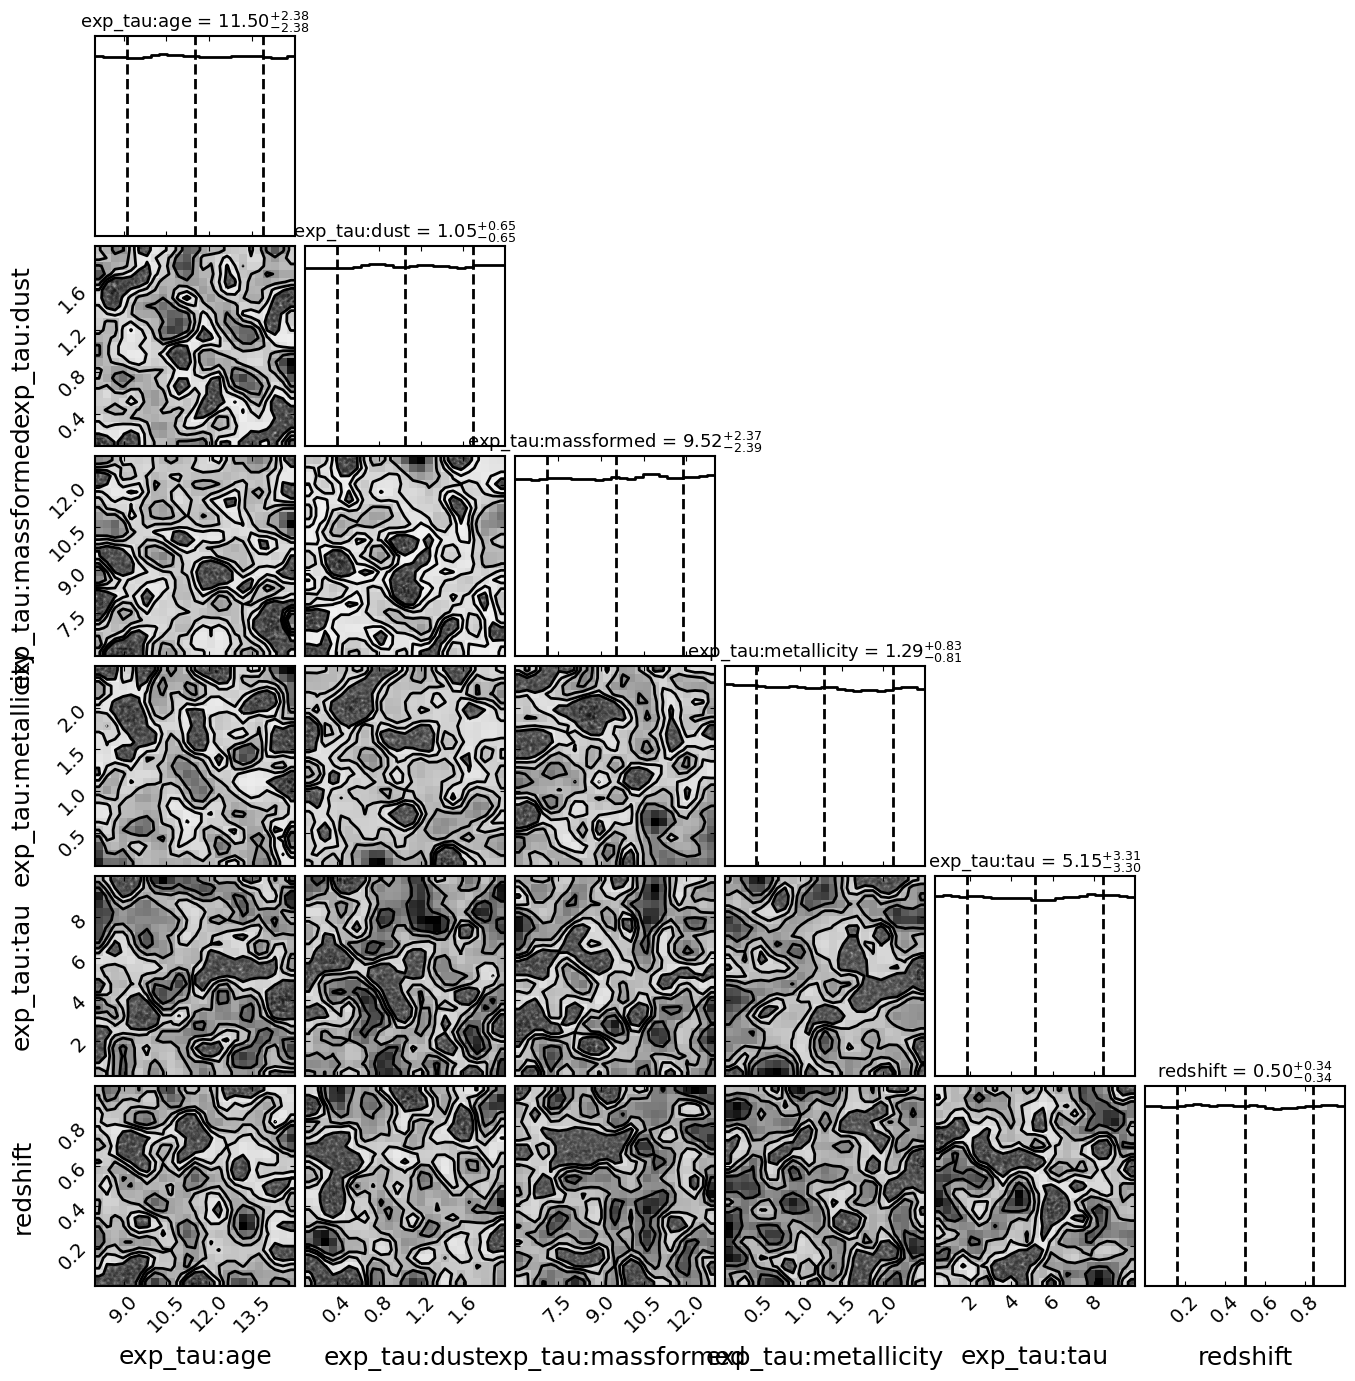

/Users/charl/Documents/PythonPlay/AS01_Testing/.venv/lib/python3.11/site-packages/bagpipes/models/star_formation_history.py:125: RuntimeWarning: divide by zero encountered in log10
  self.stellar_mass = np.log10(np.sum(self.live_frac_grid*self.ceh.grid))
/Users/charl/Documents/PythonPlay/AS01_Testing/.venv/lib/python3.11/site-packages/bagpipes/models/star_formation_history.py:126: RuntimeWarning: divide by zero encountered in log10
  self.formed_mass = np.log10(np.sum(self.ceh.grid))
/Users/charl/Documents/PythonPlay/AS01_Testing/.venv/lib/python3.11/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/Users/charl/Documents/PythonPlay/AS01_Testing/.venv/lib/python3.11/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: invalid value encountered in scalar subtract
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/Users/charl/Documents/PythonPlay/

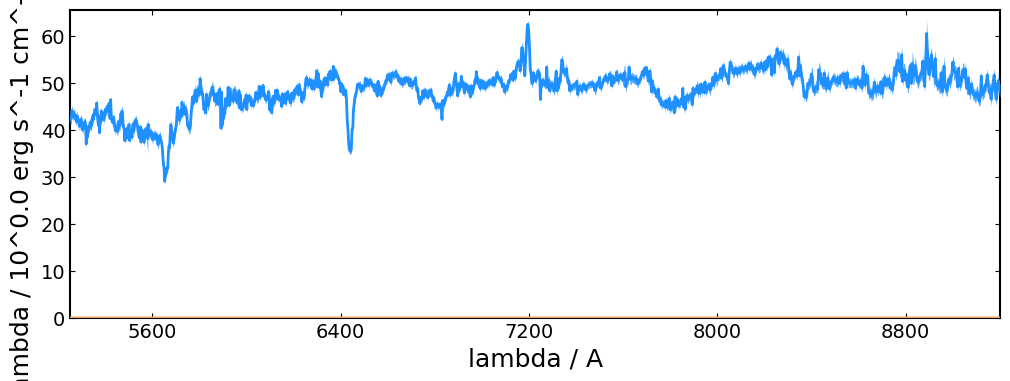

In [32]:
import numpy as np
import bagpipes as pipes
from astropy.io import fits
import os

# Delete previous results if they exist
if os.path.exists("pipes/posterior/./1.h5"):
    os.remove("pipes/posterior/./1.h5")

# Your existing load_spec and bin functions here...

# Create galaxy object
galaxy = pipes.galaxy("1", load_data=load_spec, filt_list=goodss_filt_list, photometry_exists=False)

# Define the model configuration with adjusted ranges to avoid zero values
exp_tau = {}  # Dictionary of model parameters
exp_tau["age"] = (8, 15.0)  # Minimum age > 0 to avoid divide by zero
exp_tau["tau"] = (0.3, 10.)  # Star formation timescale in Gyr
exp_tau["massformed"] = (6, 13)  # Minimum mass > 0 to avoid log(0)
exp_tau["metallicity"] = (0.1, 2.5)  # Minimum metallicity > 0
exp_tau["dust"] = (0.1, 2.)  # Dust attenuation

# Create the fit instructions
fit_instructions = {}
fit_instructions["exp_tau"] = exp_tau  # Add our model configuration
fit_instructions["redshift"] = (0., 1.)  # Fit redshift in this range

# Run the fit
fit = pipes.fit(galaxy, fit_instructions)
fit.fit(verbose=True, sampler='nautilus', n_live=1000)

# Plot the results
fig = fit.plot_corner(save=False, show=True)
fig = fit.plot_spectrum_posterior(save=False, show=True)
